## Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
! pip install pandas-datareader

In [5]:
### Data Collection
import pandas_datareader as pdr

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key="74ebf766b8826a5f0b4a5d638b23d0615efa7c76")
df

close      high     low    open     volume  \
symbol date                                                                     
AAPL   2016-01-19 00:00:00+00:00   96.66   98.6500   95.50   98.41   53087747   
       2016-01-20 00:00:00+00:00   96.79   98.1897   93.42   95.10   72334416   
       2016-01-21 00:00:00+00:00   96.30   97.8800   94.94   97.06   52161463   
       2016-01-22 00:00:00+00:00  101.42  101.4600   98.37   98.63   65800467   
       2016-01-25 00:00:00+00:00   99.44  101.5300   99.21  101.52   51794525   
...                                  ...       ...     ...     ...        ...   
       2021-01-07 00:00:00+00:00  130.92  131.6300  127.86  128.36  109578157   
       2021-01-08 00:00:00+00:00  132.05  132.6300  130.23  132.43  105158245   
       2021-01-11 00:00:00+00:00  128.98  130.1700  128.50  129.19  100620880   
       2021-01-12 00:00:00+00:00  128.80  129.6900  126.86  128.50   90440255   
       2021-01-13 00:00:00+00:00  130.89  131.4500  128.49  128.76   88636831   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2016-01-19 00:00:00+00:00   22.385352   22.846214   22.116710   
       2016-01-20 00:00:00+00:00   22.415459   22.739613   21.635005   
       2016-01-21 00:00:00+00:00   22.301980   22.667890   21.987020   
       2016-01-22 00:00:00+00:00   23.487714   23.496977   22.781369   
       2016-01-25 00:00:00+00:00   23.029169   23.513189   22.975903   
...                                      ...         ...         ...   
       2021-01-07 00:00:00+00:00  130.920000  131.630000  127.860000   
       2021-01-08 00:00:00+00:00  132.050000  132.630000  130.230000   
       2021-01-11 00:00:00+00:00  128.980000  130.170000  128.500000   
       2021-01-12 00:00:00+00:00  128.800000  129.690000  126.860000   
       2021-01-13 00:00:00+00:00  130.890000  131.450000  128.490000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2016-01-19 00:00:00+00:00   22.790632  212350988      0.0          1.0  
       2016-01-20 00:00:00+00:00   22.024074  289337664      0.0          1.0  
       2016-01-21 00:00:00+00:00   22.477988  208645852      0.0          1.0  
       2016-01-22 00:00:00+00:00   22.841582  263201868      0.0          1.0  
       2016-01-25 00:00:00+00:00   23.510873  207178100      0.0          1.0  
...                                      ...        ...      ...          ...  
       2021-01-07 00:00:00+00:00  128.360000  109578157      0.0          1.0  
       2021-01-08 00:00:00+00:00  132.430000  105158245      0.0          1.0  
       2021-01-11 00:00:00+00:00  129.190000  100620880      0.0          1.0  
       2021-01-12 00:00:00+00:00  128.500000   90440255      0.0          1.0  
       2021-01-13 00:00:00+00:00  128.760000   88636831      0.0          1.0  

[1257 rows x 12 columns]

In [7]:
df.to_csv(r"E:\DS &AI\NLP\KrisH Naik\Stock Market Prediction And Forecasting Using Stacked LSTM\AAPL.csv")

In [8]:
import pandas as pd
df=pd.read_csv(r"E:\DS &AI\NLP\KrisH Naik\Stock Market Prediction And Forecasting Using Stacked LSTM\AAPL.csv")

In [9]:
df.head(n=5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-19 00:00:00+00:00,96.66,98.6500,95.50,98.41,53087747,22.385352,22.846214,22.116710,22.790632,212350988,0.0,1.0
1,AAPL,2016-01-20 00:00:00+00:00,96.79,98.1897,93.42,95.10,72334416,22.415459,22.739613,21.635005,22.024074,289337664,0.0,1.0
2,AAPL,2016-01-21 00:00:00+00:00,96.30,97.8800,94.94,97.06,52161463,22.301980,22.667890,21.987020,22.477988,208645852,0.0,1.0
3,AAPL,2016-01-22 00:00:00+00:00,101.42,101.4600,98.37,98.63,65800467,23.487714,23.496977,22.781369,22.841582,263201868,0.0,1.0
4,AAPL,2016-01-25 00:00:00+00:00,99.44,101.5300,99.21,101.52,51794525,23.029169,23.513189,22.975903,23.510873,207178100,0.0,1.0


In [10]:
df1=df.reset_index()['high']
df1

0        98.6500
1        98.1897
2        97.8800
3       101.4600
4       101.5300
          ...   
1252    131.6300
1253    132.6300
1254    130.1700
1255    129.6900
1256    131.4500
Name: high, Length: 1257, dtype: float64

In [58]:
len(df1)

1257

In [11]:
print(df1[1162])

505.77


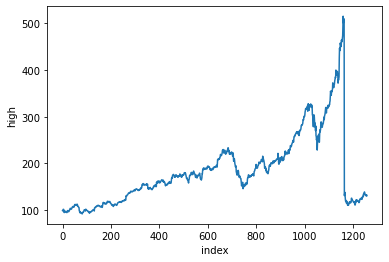

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel("index")
plt.ylabel("high")
plt.show()

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.01648287],
       [0.0153959 ],
       [0.01466456],
       ...,
       [0.09091553],
       [0.08978204],
       [0.09393818]])

In [16]:
df1.shape

(1257, 1)

In [17]:
##In time Series we splitting dataset into train and test split 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
train_data

array([[0.01648287],
       [0.0153959 ],
       [0.01466456],
       [0.02311852],
       [0.02328382],
       [0.02174888],
       [0.01171016],
       [0.00673011],
       [0.01338938],
       [0.01190167],
       [0.0103195 ],
       [0.01220866],
       [0.01336576],
       [0.01239757],
       [0.00951661],
       [0.01008336],
       [0.01105155],
       [0.0072024 ],
       [0.00668288],
       [0.01223227],
       [0.01544383],
       [0.01704961],
       [0.01201951],
       [0.01235034],
       [0.01140577],
       [0.01112239],
       [0.01201974],
       [0.0150039 ],
       [0.01549106],
       [0.02148913],
       [0.0217725 ],
       [0.02370865],
       [0.02852622],
       [0.0263537 ],
       [0.02382695],
       [0.02340189],
       [0.02496045],
       [0.0250549 ],
       [0.02654261],
       [0.03190309],
       [0.03457152],
       [0.03494935],
       [0.03502019],
       [0.03773585],
       [0.03688573],
       [0.03636621],
       [0.03442983],
       [0.034

In [16]:
test_data

array([[0.26379673],
       [0.26561504],
       [0.26748058],
       [0.27411623],
       [0.27584008],
       [0.27413984],
       [0.26762226],
       [0.26991286],
       [0.26384396],
       [0.29196873],
       [0.2856873 ],
       [0.28377453],
       [0.2766902 ],
       [0.27333695],
       [0.26842515],
       [0.25978228],
       [0.25309939],
       [0.23097268],
       [0.2314922 ],
       [0.23633315],
       [0.23803339],
       [0.23432593],
       [0.21885848],
       [0.22747774],
       [0.22207004],
       [0.20986138],
       [0.21363969],
       [0.20997946],
       [0.20705127],
       [0.20676789],
       [0.20383971],
       [0.2036744 ],
       [0.20818476],
       [0.2203698 ],
       [0.22150329],
       [0.2367346 ],
       [0.24488157],
       [0.24636928],
       [0.24629844],
       [0.24823482],
       [0.24067821],
       [0.24391338],
       [0.25649987],
       [0.25553168],
       [0.25725553],
       [0.25782228],
       [0.25619288],
       [0.254

In [19]:
len(train_data),len(test_data)

(817, 440)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 28s 1000ms/step - loss: 0.0154 - val_loss: 0.0474
Epoch 2/100
12/12 [==============================] - 4s 349ms/step - loss: 0.0023 - val_loss: 0.0198
Epoch 3/100
12/12 [==============================] - 4s 350ms/step - loss: 8.2500e-04 - val_loss: 0.0193
Epoch 4/100
12/12 [==============================] - 4s 348ms/step - loss: 3.8970e-04 - val_loss: 0.0192
Epoch 5/100
12/12 [==============================] - 4s 364ms/step - loss: 4.0354e-04 - val_loss: 0.0179
Epoch 6/100
12/12 [==============================] - 4s 345ms/step - loss: 3.0510e-04 - val_loss: 0.0175
Epoch 7/100
12/12 [==============================] - 4s 350ms/step - loss: 2.7748e-04 - val_loss: 0.0172
Epoch 8/100
12/12 [==============================] - 4s 350ms/step - loss: 2.7653e-04 - val_loss: 0.0168
Epoch 9/100
12/12 [==============================] - 4s 345ms/step - loss: 2.5902e-04 - val_loss: 0.0164
Epoch 10/100
12/12 [==============================] - 4s 348m

12/12 [==============================] - 5s 400ms/step - loss: 1.2421e-04 - val_loss: 0.0104
Epoch 79/100
12/12 [==============================] - 5s 380ms/step - loss: 1.0057e-04 - val_loss: 0.0108
Epoch 80/100
12/12 [==============================] - 4s 378ms/step - loss: 1.0988e-04 - val_loss: 0.0102
Epoch 81/100
12/12 [==============================] - 5s 408ms/step - loss: 1.2991e-04 - val_loss: 0.0103
Epoch 82/100
12/12 [==============================] - 5s 416ms/step - loss: 1.1905e-04 - val_loss: 0.0100
Epoch 83/100
12/12 [==============================] - 4s 375ms/step - loss: 1.4136e-04 - val_loss: 0.0097
Epoch 84/100
12/12 [==============================] - 5s 383ms/step - loss: 1.2915e-04 - val_loss: 0.0116
Epoch 85/100
12/12 [==============================] - 4s 375ms/step - loss: 1.5207e-04 - val_loss: 0.0097
Epoch 86/100
12/12 [==============================] - 4s 376ms/step - loss: 1.1780e-04 - val_loss: 0.0095
Epoch 87/100
12/12 [==============================] - 4s 37

In [35]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

88.54939975862752

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

83.95417266763813

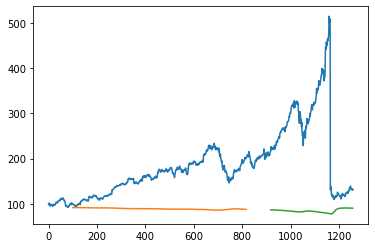

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9999999999999999,
 0.9659413890004015,
 0.9830684582142774,
 0.9877204996812053,
 0.9778732850024795,
 0.09287552837273008,
 0.10184900937492622,
 0.10935839610834294,
 0.08777481285569225,
 0.07563699907903751,
 0.06451460552105223,
 0.06486882187640211,
 0.06808038349824072,
 0.055635582213616114,
 0.0572885918719154,
 0.0641344132996434,
 0.057453892837745296,
 0.04848041183554916,
 0.04536330790847051,
 0.0437339126738612,
 0.05003896379908848,
 0.048267882022339254,
 0.04387559921600112,
 0.04904715800410889,
 0.05584811202682596,
 0.055824497603135986,
 0.060429310222684024,
 0.06151557371242353,
 0.05596618414527596,
 0.05898883037759464,
 0.05773726592202519,
 0.05639124377169577,
 0.05839846978534488,
 0.059815335206744286,
 0.07913193378515601,
 0.07962783668264575,
 0.07405483269180815,
 0.06973339315654001,
 0.07055517510095163,
 0.06788910666635181,
 0.06449099109736225,
 0.06384159444588752,
 0.06227123527050324,
 0.05875268614069476,
 0.05875268614069476,
 0.060476539

In [43]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

0 day input [ 0.96594139  0.98306846  0.9877205   0.97787329  0.09287553  0.10184901
  0.1093584   0.08777481  0.075637    0.06451461  0.06486882  0.06808038
  0.05563558  0.05728859  0.06413441  0.05745389  0.04848041  0.04536331
  0.04373391  0.05003896  0.04826788  0.0438756   0.04904716  0.05584811
  0.0558245   0.06042931  0.06151557  0.05596618  0.05898883  0.05773727
  0.05639124  0.05839847  0.05981534  0.07913193  0.07962784  0.07405483
  0.06973339  0.07055518  0.06788911  0.06449099  0.06384159  0.06227124
  0.05875269  0.05875269  0.06047654  0.05610787  0.05965003  0.04798451
  0.04489102  0.04680379  0.0564857   0.06600231  0.06501051  0.07159893
  0.06120859  0.06602593  0.06815123  0.0661244   0.06923749  0.06849151
  0.0664746   0.06467991  0.06399509  0.0612799   0.05709968  0.05922497
  0.06097244  0.06919026  0.07509221  0.07485772  0.07582591  0.07365528
  0.07769145  0.07865965  0.08095024  0.07603844  0.07341724  0.07481049
  0.08555506  0.08666493  0.08952228  0

7 day output [[-0.00375552]]
8 day input [ 0.075637    0.06451461  0.06486882  0.06808038  0.05563558  0.05728859
  0.06413441  0.05745389  0.04848041  0.04536331  0.04373391  0.05003896
  0.04826788  0.0438756   0.04904716  0.05584811  0.0558245   0.06042931
  0.06151557  0.05596618  0.05898883  0.05773727  0.05639124  0.05839847
  0.05981534  0.07913193  0.07962784  0.07405483  0.06973339  0.07055518
  0.06788911  0.06449099  0.06384159  0.06227124  0.05875269  0.05875269
  0.06047654  0.05610787  0.05965003  0.04798451  0.04489102  0.04680379
  0.0564857   0.06600231  0.06501051  0.07159893  0.06120859  0.06602593
  0.06815123  0.0661244   0.06923749  0.06849151  0.0664746   0.06467991
  0.06399509  0.0612799   0.05709968  0.05922497  0.06097244  0.06919026
  0.07509221  0.07485772  0.07582591  0.07365528  0.07769145  0.07865965
  0.08095024  0.07603844  0.07341724  0.07481049  0.08555506  0.08666493
  0.08952228  0.08838879  0.08652325  0.10091624  0.09625239  0.09868468
  0.107847

15 day output [[-0.00223524]]
16 day input [ 0.04848041  0.04536331  0.04373391  0.05003896  0.04826788  0.0438756
  0.04904716  0.05584811  0.0558245   0.06042931  0.06151557  0.05596618
  0.05898883  0.05773727  0.05639124  0.05839847  0.05981534  0.07913193
  0.07962784  0.07405483  0.06973339  0.07055518  0.06788911  0.06449099
  0.06384159  0.06227124  0.05875269  0.05875269  0.06047654  0.05610787
  0.05965003  0.04798451  0.04489102  0.04680379  0.0564857   0.06600231
  0.06501051  0.07159893  0.06120859  0.06602593  0.06815123  0.0661244
  0.06923749  0.06849151  0.0664746   0.06467991  0.06399509  0.0612799
  0.05709968  0.05922497  0.06097244  0.06919026  0.07509221  0.07485772
  0.07582591  0.07365528  0.07769145  0.07865965  0.08095024  0.07603844
  0.07341724  0.07481049  0.08555506  0.08666493  0.08952228  0.08838879
  0.08652325  0.10091624  0.09625239  0.09868468  0.10784707  0.1112688
  0.10465913  0.10170732  0.09904267  0.094623    0.09299336  0.09436324
  0.09672468

23 day output [[-0.00095279]]
24 day input [ 0.0558245   0.06042931  0.06151557  0.05596618  0.05898883  0.05773727
  0.05639124  0.05839847  0.05981534  0.07913193  0.07962784  0.07405483
  0.06973339  0.07055518  0.06788911  0.06449099  0.06384159  0.06227124
  0.05875269  0.05875269  0.06047654  0.05610787  0.05965003  0.04798451
  0.04489102  0.04680379  0.0564857   0.06600231  0.06501051  0.07159893
  0.06120859  0.06602593  0.06815123  0.0661244   0.06923749  0.06849151
  0.0664746   0.06467991  0.06399509  0.0612799   0.05709968  0.05922497
  0.06097244  0.06919026  0.07509221  0.07485772  0.07582591  0.07365528
  0.07769145  0.07865965  0.08095024  0.07603844  0.07341724  0.07481049
  0.08555506  0.08666493  0.08952228  0.08838879  0.08652325  0.10091624
  0.09625239  0.09868468  0.10784707  0.1112688   0.10465913  0.10170732
  0.09904267  0.094623    0.09299336  0.09436324  0.09672468  0.09091553
  0.08978204  0.09393818 -0.00400749 -0.00400749 -0.0040911  -0.00411496
 -0.0041

In [44]:
import numpy as np
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
len(df1)

1257

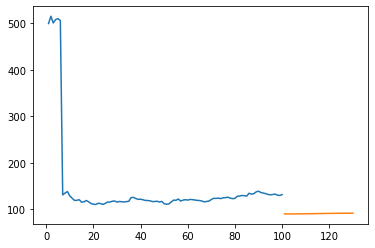

In [57]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

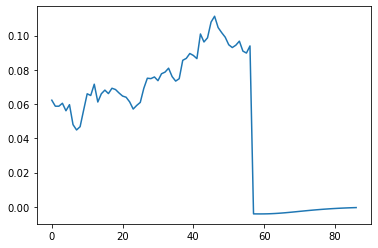

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

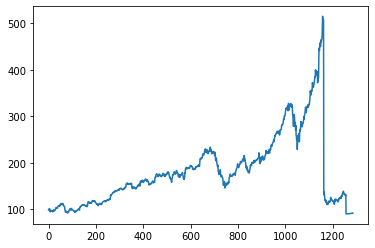

In [52]:
plt.plot(df3)